# Stroke Prediction Data Overview & Analysis
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This study is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. This study uses [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) and a synthetically created dataset drived from it for a Kaggle competition, [Binary Classification with a Tabular Stroke Prediction Dataset](https://www.kaggle.com/competitions/playground-series-s3e2/data) [1][2].

### Data Sampling and Collection
The author of the real world data we use states that the source of this dataset is confidential therefore we do not know how it's collection or sampling were made. The synthetic data's description states that it was created by a deep learning model tranied on the real world data that we currently use. Thus, if the real world data has any bias in its collection, that means our synthetic data has the bias as well. However, we do not have any information about the real world data's collection or sampling. We will mention some attributes that makes us raise some eyebrows later on in this study.   

This could be a refined subset of the original dataset which is based on the Electronic Health Record (EHR) controlled by McKinsey & Company; the original dataset was used as the dataset as part of their healthcare hackathon.    
[Hackathon](https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon/#DiscussTab) [3]   
[Source](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9264165) [4]

This [paper](https://ieeexplore.ieee.org/document/9297525) claims to have collected the data in Bangladesh [5].  

Still, the sources of the EMR seem to be confidential and the dataset's author does not say anything about the data besides that. 

### A Side Note
We found that with data like this, there are going to be people who have all the risk factors and did not suffer from a stroke, *yet*. My reasoning for this is that there are people who have all the risk factors, but are young enough where they simply have not had a stroke yet. Case and point, the average age for people with hypertension and no stroke was about 61.21, while the average age for people with hypertension and had a stroke was almost 70. This may not seem like much, but what that says to me is that the people with hypertension on average might have a couple more years until they potentially a stroke.

### Importing necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from dython.nominal import associations

warnings.filterwarnings("ignore", category=FutureWarning)



### Reading the data

In [2]:
reaL_world_df_path = os.path.abspath('data/real-world-data/healthcare-dataset-stroke-data.csv')
synthetic_df_root_path = os.path.abspath('data/synthetic-data/')
synthetic_df_path = os.path.join(synthetic_df_root_path, 'train.csv')

In [3]:
real_world_data_df = pd.read_csv(reaL_world_df_path)
synthetic_data_df = pd.read_csv(synthetic_df_path)
print("Real Word Data Shape: ", real_world_data_df.shape)
print("Synthetic Data Shape: ", synthetic_data_df.shape)

Real Word Data Shape:  (5110, 12)
Synthetic Data Shape:  (15304, 12)


In [4]:
real_world_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
synthetic_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [6]:
real_world_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
synthetic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [8]:
real_world_data_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
synthetic_data_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


Our dataframes look similar in terms of data types and data points. We don't need to worry about a column not existing in another

In [10]:
df = pd.concat([synthetic_data_df, real_world_data_df], ignore_index=True, axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


Summary of the concatenated dataframe:

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20414 non-null  int64  
 1   gender             20414 non-null  object 
 2   age                20414 non-null  float64
 3   hypertension       20414 non-null  int64  
 4   heart_disease      20414 non-null  int64  
 5   ever_married       20414 non-null  object 
 6   work_type          20414 non-null  object 
 7   Residence_type     20414 non-null  object 
 8   avg_glucose_level  20414 non-null  float64
 9   bmi                20213 non-null  float64
 10  smoking_status     20414 non-null  object 
 11  stroke             20414 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.9+ MB


In [13]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20213.000000,20414.000000
mean,14877.273636,41.870510,0.061673,0.031008,93.322256,28.302280,0.043157
std,16825.306948,21.756482,0.240567,0.173344,32.476351,7.021765,0.203215
min,0.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,4766.250000,25.000000,0.000000,0.000000,75.220000,23.500000,0.000000
50%,9511.500000,43.000000,0.000000,0.000000,86.250000,27.700000,0.000000
75%,14279.750000,58.000000,0.000000,0.000000,99.730000,32.200000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Something to Consider
The maxiumum BMI that was recorded (in real world data) is 97.6 which is a bit odd since its a _really_ high value when you consider BMI over 40 is considered Obese (Class III) -which is the maximum obesity level that exists. However, this value is not possible since the highest BMI that was ever recorded is 186, help by Jon Brower Minnoch [6].

**BMI, basic categories** [7]

|**Category**|**BMI (kg/m^2)**|**BMI Prime**|
|---|---|---|
|Underweight (Severe thinness) |	< 16.0 	|< 0.64|
|Underweight (Moderate thinness) |	16.0 – 16.9| 	0.64 – 0.67|
|Underweight (Mild thinness) |	17.0 – 18.4 |	0.68 – 0.73|
|Normal range |	18.5 – 24.9 |	0.74 – 0.99|
|Overweight (Pre-obese) |	25.0 – 29.9 |	1.00 – 1.19|
|Obese (Class I) |	30.0 – 34.9 |	1.20 – 1.39|
|Obese (Class II) |	35.0 – 39.9 |	1.40 – 1.59|
|Obese (Class III) |	≥ 40.0 |	≥ 1.60 |

## Granuality
Our data has a fine granuality. The provided values for each datum are very prices with decimal measurements. It doesn't contain bins and has well defined classes.

In [14]:
categorical = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
binary = ["hypertension", "heart_disease", "stroke"] # Basically, categorical values with only 2 values. 1 or 0
continous_numerical = ["age", "avg_glucose_level", "bmi"]

In [15]:
for col in categorical:
    print(f"{col} : {df[col].unique()}")

gender : ['Male' 'Female' 'Other']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['never smoked' 'formerly smoked' 'Unknown' 'smokes']


## Type of Data

|Type of data| Column Name | Description |
|---|----|---|
|int64 | id| unique identifier |
|object | gender| "Male", "Female" or "Other"|
|float64 | age| age of the patient|
|int64 | hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension|
|int64|heart_disease | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease|
|object|ever_married | "No" or "Yes"|
|object|work_type| "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"|
|object|Residence_type| "Rural" or "Urban"|
|float64|avg_glucose_level| average glucose level in blood|
|float64|bmi| body mass index|
|object|smoking_status| "formerly smoked", "never smoked", "smokes" or "Unknown"*|
|int64|stroke| 1 if the patient had a stroke or 0 if not|


**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

## Data Cleaning

### Missing Data

In [16]:
print(f"Count of missing values in synthetic data:\n {synthetic_data_df.isnull().sum()}")
print(f"Count of missing values in real world data:\n {real_world_data_df.isnull().sum()}")

Count of missing values in synthetic data:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Count of missing values in real world data:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Our artificial data doesn't have any missing values as expected, however the real world data has 201 missing values in the `bmi` column. There are many ways to deal with missing values. One can simply drop these records, fill the blanks with the mean, the median, use an imputer, or even use a machine learning technique such as Decision Tree to predict the missing BMI.

From our research, we conclude that predicting the missing values seems like our best option. However, since we already have an artificially created dataframe, we have concerns about how further "artificializing" our data may effect our model. Therefore, we are going to use multiple approaches and experiment with out data. 

**Insight:**
- Data from `bmi` feature is missing.
- Both Categorical and numerical features are present.
    - Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
    - Binary Numerical Features: hypertension,heart_disease, stroke
    - Continous Numerical Features: age, avg_glucose_level, bmi
- Most of the data is categorical which need a special attention to visulaize those
- Feature extraction can be done by binning the continous features (age, sugar level, and bmi).


The only missing value is BMI. 
We believe we can use a [decision tree refressor to predict the missing BMI values](https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data). We will aslo try other approaches like imputing the missing BMI values with their mean. [9]

### Outliers
We will use a simple &#177;1.5 * IQR  to identifty outliers for now.

In [17]:
for values in continous_numerical:
    q1 = df[values].quantile(0.25)
    q3 = df[values].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(f"Upper bound for {values} is {upper_bound}")
    print(f"Lower bound for {values} is {lower_bound}")
    print(f"Outliers in {values}:\n {df[(df[values] < lower_bound) | (df[values] > upper_bound)][values]}")


Upper bound for age is 107.5
Lower bound for age is -24.5
Outliers in age:
 Series([], Name: age, dtype: float64)
Upper bound for avg_glucose_level is 136.495
Lower bound for avg_glucose_level is 38.45499999999999
Outliers in avg_glucose_level:
 22       196.61
33       223.36
61       182.90
69       196.58
81       140.28
          ...  
20368    193.88
20371    138.51
20380    174.37
20390    152.56
20412    166.29
Name: avg_glucose_level, Length: 1355, dtype: float64
Upper bound for bmi is 45.25000000000001
Lower bound for bmi is 10.449999999999996
Outliers in bmi:
 127      48.2
561      48.8
693      50.1
777      46.3
819      47.1
         ... 
20256    56.6
20280    46.0
20313    49.5
20361    47.6
20407    46.9
Name: bmi, Length: 368, dtype: float64


It seems that we have 1355 outliers in `avg_glucose` and 368 in `bmi`.

This is expected as we will see that both of those attribuıtes are left skewed and these outliers tend to have stroke.

In [18]:
(df.loc[(df['bmi'] > 45.25) & (df["avg_glucose_level"]>136.5), 'stroke'] == 1).value_counts()

stroke
False    66
True     10
Name: count, dtype: int64

This is interesting since we'd expect such an outlier person to have a stroke more often than not but our data shows only around 13% of these people had a stroke.   
Let's look at their ages.

In [19]:
(df.loc[(df['bmi'] > 45.25) & (df["avg_glucose_level"]>136.5), 'age']).describe()

count    76.000000
mean     54.460526
std      13.073577
min      18.000000
25%      45.000000
50%      53.500000
75%      63.250000
max      82.000000
Name: age, dtype: float64

In [20]:
(df.loc[(df['bmi'] > 45.25) & (df["avg_glucose_level"]>136.5) & (df["stroke"]==1), 'age'])

4636     73.0
7155     58.0
12066    73.0
15325    52.0
15370    70.0
15383    43.0
15417    45.0
15467    78.0
15494    65.0
15500    70.0
Name: age, dtype: float64

In [21]:
(df.loc[(df['bmi'] > 45.25) & (df["avg_glucose_level"]>136.5) & (df["stroke"]==1), 'age']).describe()

count    10.000000
mean     62.700000
std      12.454807
min      43.000000
25%      53.500000
50%      67.500000
75%      72.250000
max      78.000000
Name: age, dtype: float64

In [22]:
(df.loc[(df['bmi'] > 45.25) & (df["avg_glucose_level"]>136.5) & (df["stroke"]==0), 'age']).describe()

count    66.000000
mean     53.212121
std      12.794849
min      18.000000
25%      45.000000
50%      52.000000
75%      62.000000
max      82.000000
Name: age, dtype: float64

We see that people who had a stroke has a mean age of 62.7 and people who didn't have a stroke has a mean age of 53.2.

**Insight:**    
Outliers who are older are more likely to have stroke.
This may mean age is a great factor regarding stroke. We will explore this more.

## Categotical Features

Below, we can see that 4.3% of people had a stroke in our dataset

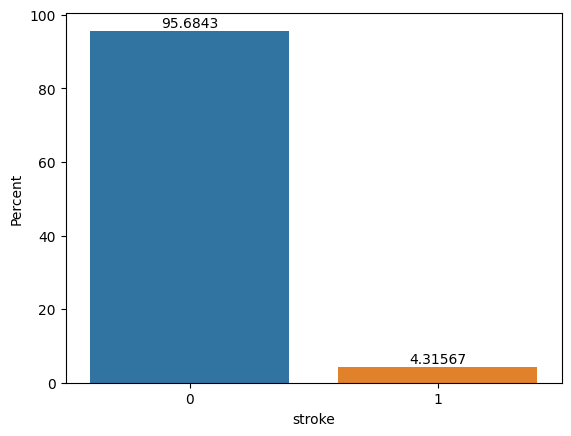

In [23]:
stroke_percentages = df["stroke"].value_counts(normalize=True)
stroke_percentages = stroke_percentages.mul(100).rename('Percent').reset_index()
f = sns.barplot(x="stroke", y='Percent', data=stroke_percentages)
for i in f.containers:
    f.bar_label(i,)
plt.show()

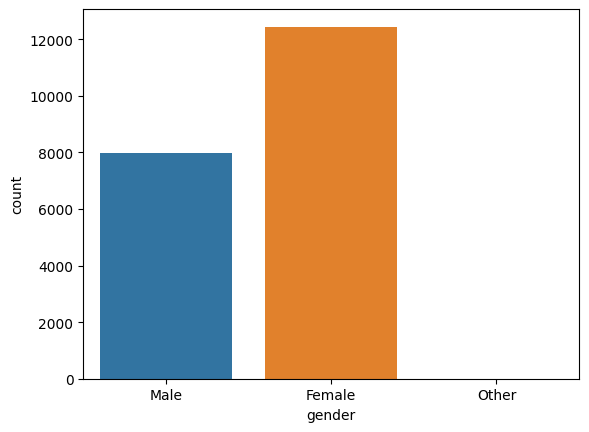

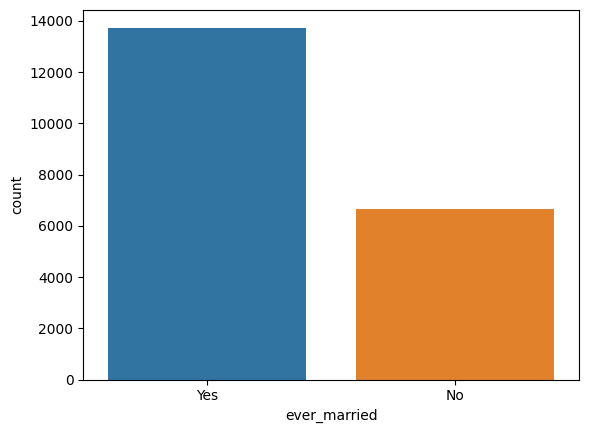

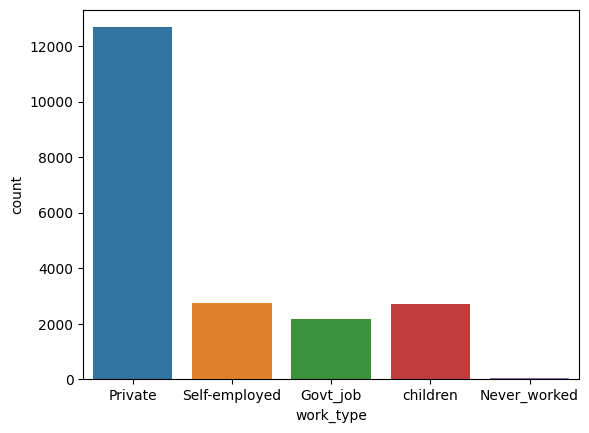

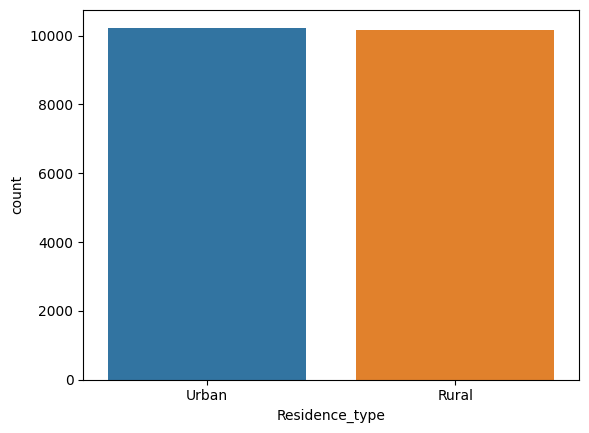

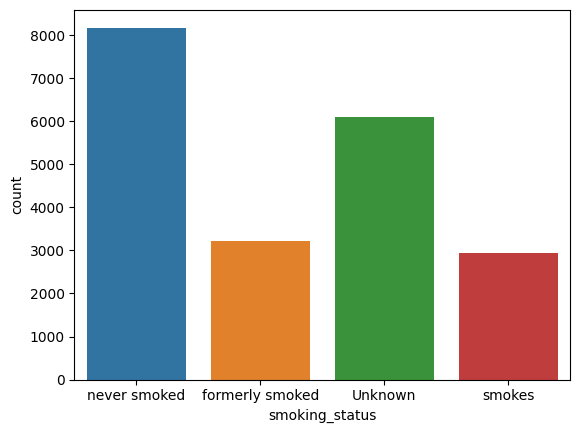

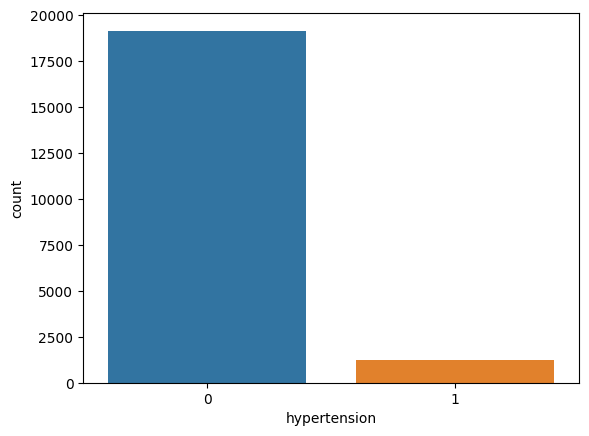

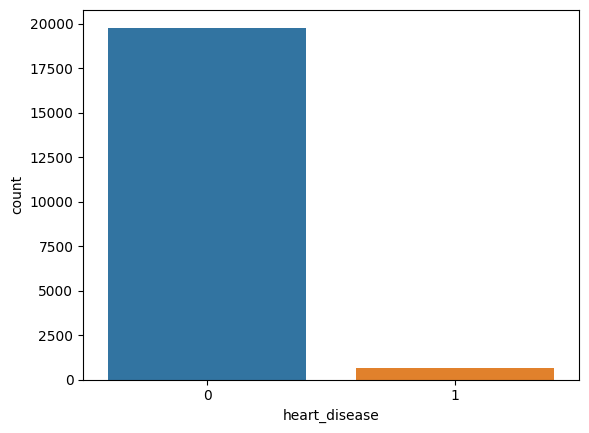

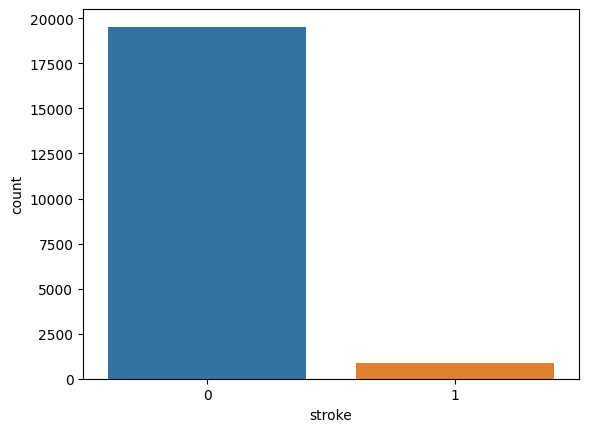

In [24]:
for c_feature in categorical+binary:
    sns.countplot(data=df, x=c_feature)
    plt.show()

It doesn't seem like there is many "Other"s and `gender` or "Never_worked"s in `work_type`

In [25]:
df.loc[df["gender"]=="Other"].shape[0] # There is only 2 "Other"s in gender column.

2

In [26]:
df.loc[df["work_type"]=="Never_worked"].shape[0]

64

**Insight:**

- Given the imbalanced nature of the classes in the dataset, it is advisable to utilize a StratifiedKFold approach for cross-validation. This technique ensures that each fold of the cross-validation maintains a similar class distribution as the original dataset. By using stratification, we can mitigate potential biases and obtain more reliable performance estimates for the model across different folds.
- Because the classes are imbalanced, accuracy would be a bad metric to evaluate a classifier. The competition metri is area under the curve.

## Correlation between stroke and categorical features

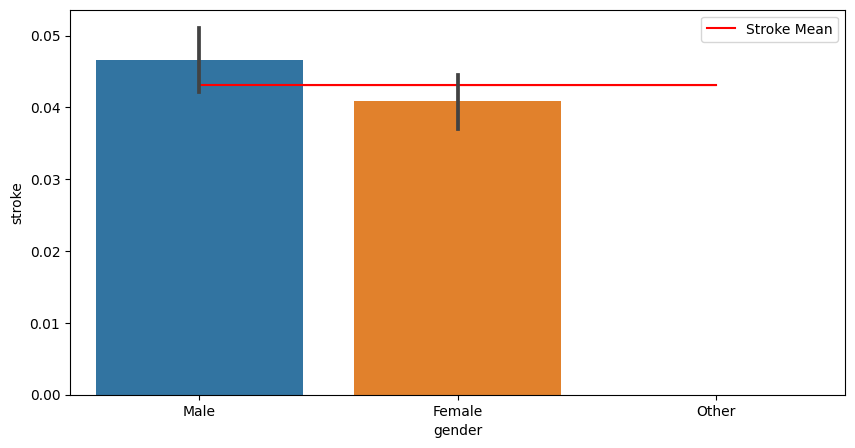

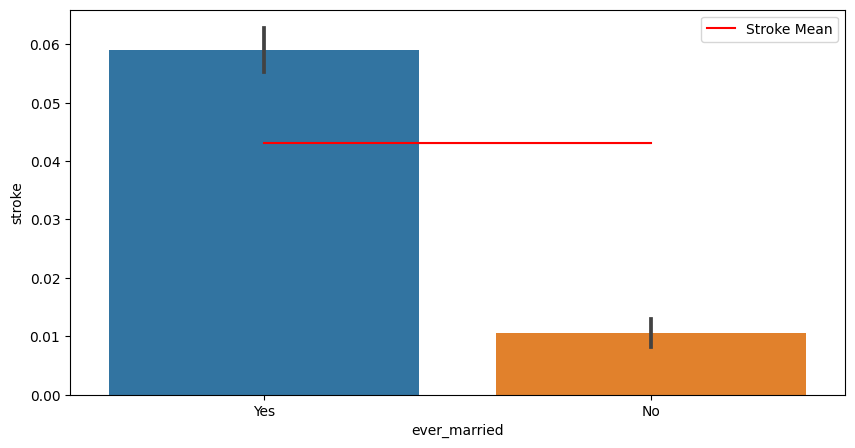

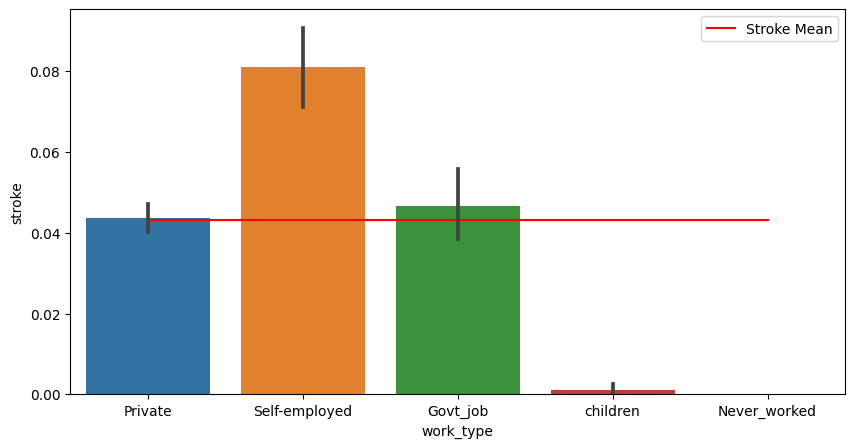

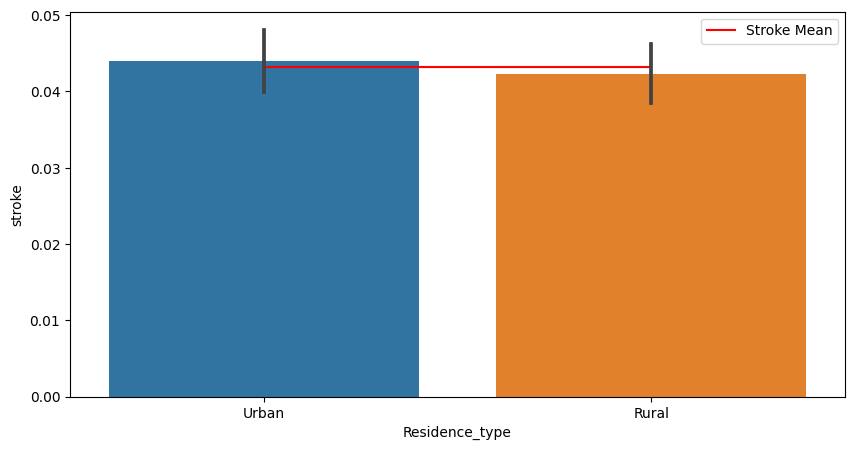

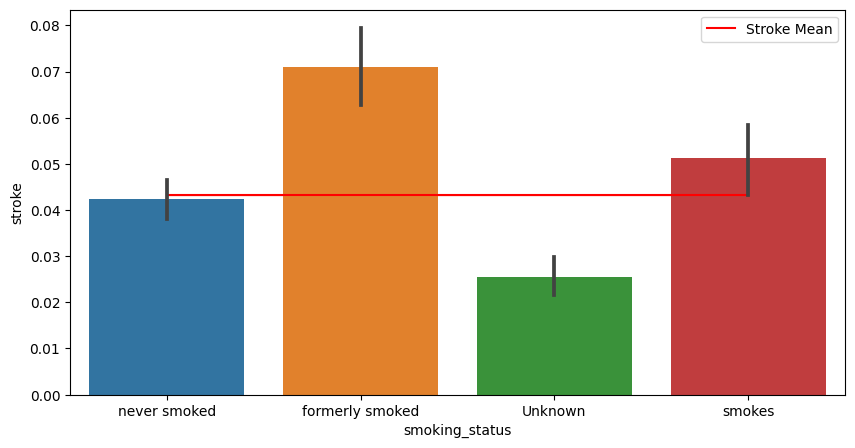

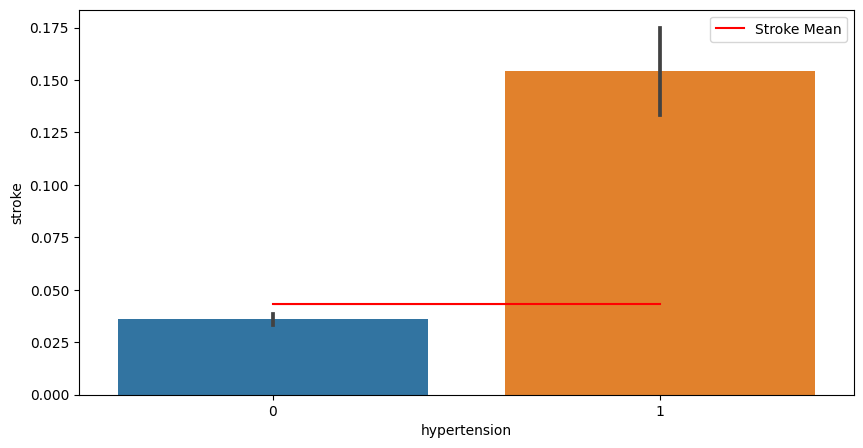

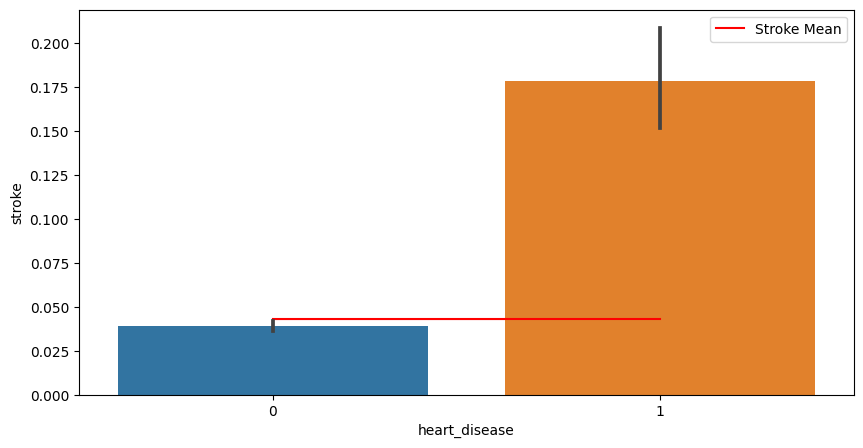

In [27]:
for c_feature in categorical+binary:
    if c_feature == "stroke":
        continue
    plt.figure(figsize=(10,5))
    sns.lineplot(x=c_feature, y = df["stroke"].mean(), data = df, color="red", label="Stroke Mean")
    sns.barplot(x=c_feature, y = "stroke", data = df)
    plt.show()

From the above figures, the maritial status (`ever_married`) seems to be a discriminator.
    Martial status maybe correlated to a person's age as well since the average age of marriage in the US is around 31. 
`smoking_status` and `work_type` seems to be dependant to stoke as well.
Strokes are morke likely when the people had hypertension, heart deseaes, or have any record of smoking.  
We can threath `smoking_status=="Unknown"` as a missing value and try different imputation strategies. This intuition is becasue that category shows a low probability of stroke and there may be people that smoke in the past.

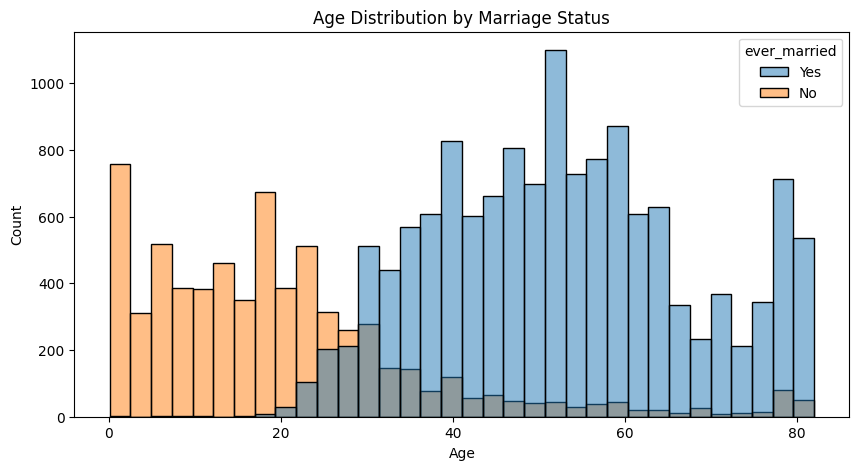

In [28]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=df, x="age", hue="ever_married")
ax.set_title("Age Distribution by Marriage Status")
ax.set_xlabel("Age")
plt.show()

As we expected; as the age increases, number of people who were ever married increases as well.

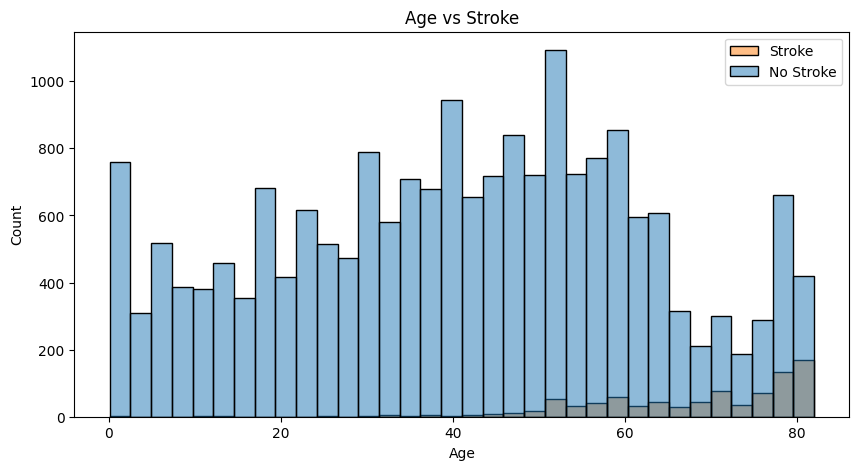

In [29]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=df, x="age", hue="stroke")
ax.set_title("Age vs Stroke")
ax.set_xlabel("Age")
ax.legend(["Stroke", "No Stroke"])
plt.show()

From the above two graphs, we can conculde that age seems to be a contributing factor to stroke. Also, as the age increases the number of married pople are increasing as well. This is probably a possible reason why maritial status seems to have a relation with stroke.

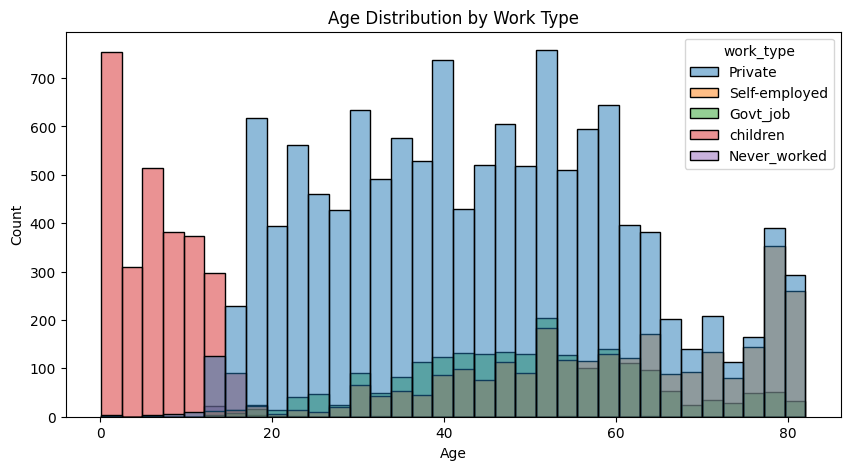

In [30]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=df, x="age", hue="work_type")
ax.set_title("Age Distribution by Work Type")
ax.set_xlabel("Age")
plt.show()

The above distribution shows us that number of self-employed people increase as the age increases and we have seen that work_type is not independent from stroke. We know age is an important contributor to stroke. This probably explains why work_type turns out not independent from stroke. This probably explains the contribution of employment type to stoke.

## Numerical Features

Insights

- The older the people are, the probability of having a stroke increases. This is more pronounced after the age of 40, maybe cliping lower values can be used as preprocessing step.
- There is clear relantionship between strokes and the glucose level.
- The relantionship between BMI and stroke doesn't hold when BMI > 40, which is contradictory and it may be because we don't have lots of samples on those bins. Overweight (Pre-obese) and higher BMI are more likely to have a stroke.


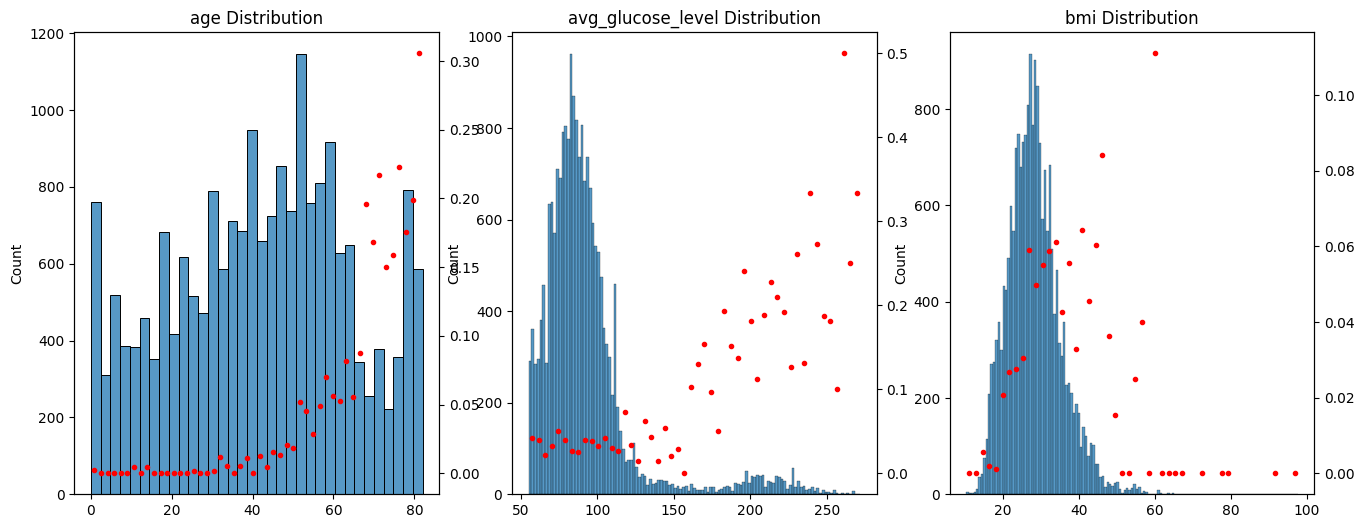

In [31]:
def add_secondary_plot(
    df, column, target_column, ax, n_bins=50, color=3,
    show_yticks=False,
):
    secondary_ax = ax.twinx()
    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df.groupby(bins)[target_column].mean()
    target.plot(
        ax=secondary_ax, linestyle='',
        marker='.', color="red", label=f'Mean {target_column}'
    )
    secondary_ax.grid(visible=False)
    
    if not show_yticks:
        secondary_ax.get_yaxis().set_ticks([])
        
    return secondary_ax

columns = continous_numerical
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.histplot(
        data=df,
        x=column,
        common_norm=False,
        ax=ax[i],
    )
    
    # Secondary axis to show mean of target
    ax2 = add_secondary_plot(df, column, 'stroke', ax[i], n_bins=50, color=4, show_yticks=True)
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove legends to show only one at the end
    plot_axes = [ax[i], ax2]

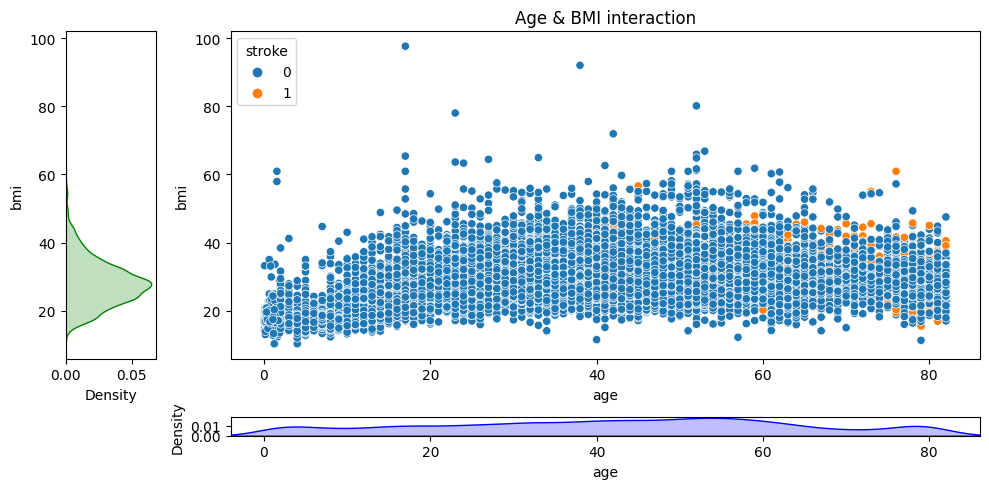

In [32]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(6, 6)
ax1 = fig.add_subplot(gs[:5, 1:])
ax2 = fig.add_subplot(gs[:5, 0])
ax3 = fig.add_subplot(gs[5, 1:])

sns.scatterplot(x=df["age"], y=df["bmi"], hue=df["stroke"], ax=ax1)
sns.kdeplot(y=df["bmi"], ax=ax2, color="green", fill=True)
sns.kdeplot(x=df["age"], ax=ax3, color="blue", fill=True)

ax1.set_title('Age & BMI interaction')
legend = ax1.legend(loc='upper left');
legend.set_title('stroke');

ax2.set_ylim(ax1.get_ylim())
ax3.set_xlim(ax1.get_xlim())
plt.tight_layout()

The nature of our features will select the type of correlation we should calculate between each pair. For the following plots I'm using `dython` implementation to grab associations between features according to their nature:

    - Pearson correlation between for continous-continous pairs.
    - Cramér's V with bias correction for categorical-categorical.
    - Correlation Ratio for categorical-continous.


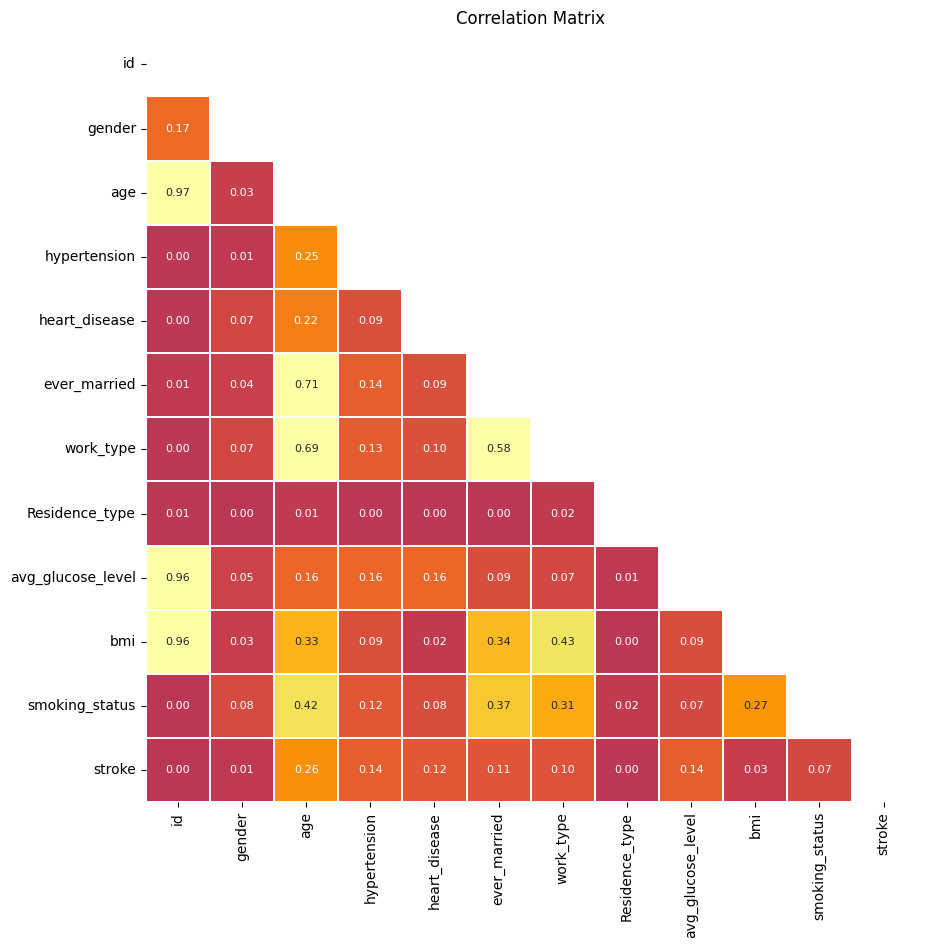

In [33]:
fig = plt.figure(figsize=(10, 10))
float_types = [np.float16, np.float32, np.float64]
float_columns = df.select_dtypes(include=float_types).columns
vmax, vmin = 0.5, 0

    
corr = associations(
        df, numerical_columns=continous_numerical,
        nominal_columns=categorical+binary,
        compute_only=True,
        plot=False
    )['corr']
    
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
        corr, mask=mask, cmap='inferno',
        vmax=vmax, vmin=vmin,
        center=0, annot=True, fmt='.2f',
        square=True, linewidths=.1,
        cbar=False,
        cbar_ax=None,
        annot_kws={"size": 8}
    );

plt.title('Correlation Matrix');

> No strong correlations for continous-continous pairs, no need to drop features for linear models.

## Modeling & Inferences
Modeling will not be done here. It is in the file titled `model.py`. However, we will certainly use the insight we gained.  
##### Things to try and experiment based on our insight:
- Use StratifiedKFold for cross-validation.
- Out-of-fold (OOF) refers to a step in the learning process when using k-fold validation in which the predictions from each set of folds are grouped together into one group of 1000 predictions. These predictions are now "out-of-the-folds" and thus error can be calculated on these to get a good measure of how good your model is. 
- Leaderboard results and an evaluation dataset will be used to check for overfitting.
- This is a binary classification task and The Kaggle Competition this is based off of uses `area under the ROC` as its evaluation metric, therefore we will use the same metric.
- Use [feature-engine](https://feature-engine.trainindata.com/en/latest/) for feature engineering and selection. [8]
- Feature selection using RecursiveFeatureElimanation
- `Gender` doesn't seem to have much of a correlation with stroke, we may try replacing `"Other"`.
- Impute `"Unknown"` in `smoking_status` as `"never_smoked"`.
- Try experimenting with different models and use a XGBoost ensemble in order to achieve high scores.  

## References
[1][Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)   
[2][Binary Classification with a Tabular Stroke Prediction Dataset](https://www.kaggle.com/competitions/playground-series-s3e2/data)   
[3][Hackathon](https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon/#DiscussTab)    
[4][Research Paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9264165)    
[5][Resarch Paper 2](https://ieeexplore.ieee.org/document/9297525)    
[6]https://en.wikipedia.org/wiki/Jon_Brower_Minnoch   
[7]https://en.wikipedia.org/wiki/Body_mass_index    
[8][Decision Tree Refressor to Predict the Missing BMI Values](https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data)